### Data Cleaning and Preprocessing

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [3]:
#https://github.com/amueller/word_cloud
#pip install wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
#load the datasets
ldr = pd.read_csv('lana.csv')
metal = pd.read_csv('metall.csv')

In [6]:
ldr.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,author_cakeday,edited,banned_by,created
0,[],False,samandrewny,NaN,[],NaN,text,t2_9sp67sdb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30 17:52:33
1,[],False,artisticphangirl,NaN,[],NaN,text,t2_4ezoh67f,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30 17:24:14
2,[],False,ambriebat,NaN,[],NaN,text,t2_4itrzwbz,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30 16:05:20
3,[],False,user2113311,NaN,[],NaN,text,t2_5o85vp93,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30 15:54:50
4,[],False,BLIGATORY,NaN,[],NaN,text,t2_bgmgkrte,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-30 15:50:06


In [7]:
ldr.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subred

In [8]:
columns_to_keep = ['subreddit','is_self','is_video','selftext','title','subreddit_id','created_utc', 'upvote_ratio','author','num_comments']
ldr_col = ldr[columns_to_keep]
metal_col = metal[columns_to_keep]

In [9]:
ldr_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments
0,lanadelrey,False,False,NaN,"Came across this, if it's true what genre do w...",t5_2tegk,1640908353,1.0,samandrewny,0
1,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0
2,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0
3,lanadelrey,True,False,[removed],Born to Die Deluxe Vinyl,t5_2tegk,1640901290,1.0,user2113311,0
4,lanadelrey,True,False,Hi everyone! We are a community-focused music ...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0


### Drop duplicates

In [10]:
ldr_col.drop_duplicates(keep='first', inplace=True)

In [11]:
ldr_col.shape

(1497, 10)

In [12]:
metal_col.drop_duplicates(keep='first', inplace=True)

In [13]:
metal_col.shape

(1498, 10)

### Drop null values

In [14]:
ldr_col.isnull().sum()

subreddit         0
is_self           0
is_video          0
selftext        804
title             0
subreddit_id      0
created_utc       0
upvote_ratio      0
author            0
num_comments      0
dtype: int64

In [15]:
metal_col.isnull().sum()

subreddit         0
is_self           0
is_video          0
selftext        911
title             0
subreddit_id      0
created_utc       0
upvote_ratio      0
author            0
num_comments      0
dtype: int64

In [16]:
ldr_col.dropna(inplace=True)

In [17]:
metal_col.dropna(inplace=True)

In [18]:
ldr_col.isnull().sum()

subreddit       0
is_self         0
is_video        0
selftext        0
title           0
subreddit_id    0
created_utc     0
upvote_ratio    0
author          0
num_comments    0
dtype: int64

In [19]:
metal_col.isnull().sum()

subreddit       0
is_self         0
is_video        0
selftext        0
title           0
subreddit_id    0
created_utc     0
upvote_ratio    0
author          0
num_comments    0
dtype: int64

In [20]:
ldr_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 1 to 1497
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     693 non-null    object 
 1   is_self       693 non-null    bool   
 2   is_video      693 non-null    bool   
 3   selftext      693 non-null    object 
 4   title         693 non-null    object 
 5   subreddit_id  693 non-null    object 
 6   created_utc   693 non-null    int64  
 7   upvote_ratio  693 non-null    float64
 8   author        693 non-null    object 
 9   num_comments  693 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 50.1+ KB


In [21]:
metal_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 1490
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     587 non-null    object 
 1   is_self       587 non-null    bool   
 2   is_video      587 non-null    bool   
 3   selftext      587 non-null    object 
 4   title         587 non-null    object 
 5   subreddit_id  587 non-null    object 
 6   created_utc   587 non-null    int64  
 7   upvote_ratio  587 non-null    float64
 8   author        587 non-null    object 
 9   num_comments  587 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 42.4+ KB


### Drop non-text posts

In [22]:
#is_self documentation states that if true, the submission is a selfpost (text-only)
ldr_col[ldr_col['is_self']==False][:5]

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments
521,lanadelrey,False,True,[deleted],Vbbn,t5_2tegk,1639651306,1.0,[deleted],0
754,lanadelrey,False,False,[deleted],Came just in time for my cake day 😍✨,t5_2tegk,1639022462,1.0,[deleted],0
757,lanadelrey,False,False,[deleted],This sucks :( Anyone else get this email?,t5_2tegk,1639020181,1.0,[deleted],0
775,lanadelrey,False,False,[deleted],Serial Killer - Lana Del Rey (COVER),t5_2tegk,1638994580,1.0,[deleted],0
1277,lanadelrey,False,False,[deleted],What Scares Lana About Success?! 😱😳,t5_2tegk,1638215180,1.0,[deleted],0


In [23]:
#keeping the original copy for EDA
ori_ldr = ldr_col
ori_met = metal_col

In [24]:
#filter only posts with text only
ldr_col = ldr_col[ldr_col['is_self']==True]

In [25]:
metal_col = metal_col[metal_col['is_self']==True]

### Drop ['removed']

In [26]:
ldr_col = ldr_col[ldr_col['selftext']!='[removed]']

In [27]:
metal_col = metal_col[metal_col['selftext']!='[removed]']

In [28]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

In [29]:
ldr_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments
1,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0
2,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0
4,lanadelrey,True,False,Hi everyone! We are a community-focused music ...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0
5,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0
10,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0


### Drop characters and raw text from posts using redditcleaner

In [30]:
#https://github.com/LoLei/redditcleaner
#pip install redditcleaner

In [31]:
import redditcleaner

In [32]:
ldr_col['selftext'] = ldr_col['selftext'].map(redditcleaner.clean)

In [33]:
metal_col['selftext'] = metal_col['selftext'].map(redditcleaner.clean)

In [34]:
ldr_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments
1,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0
2,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0
4,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0
5,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0
10,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0


In [35]:
ldr_col['selftext'][250]

'When I mustered the energy to go out into the living room today, I hear my dad listening to Black Beauty and I feel this happiness. But that soon dissipates because when my sister mentions that she has good songs, my father replies that her albums remained on his computer, but as soon as he listens to her songs he deletes them, because they are too "gloomy and slow". My disappointment is unmeasurable. Time to listen to more Lana today.'

### Exploring Lemmatizer,Stemmer and stopwords

In [36]:
# Imports
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS
import re
from sklearn.metrics import accuracy_score

In [37]:
#exploring stop words, stemming, and lemmatization.

In [38]:
tokenizer = RegexpTokenizer(r'\w+')

In [39]:
stemmer = PorterStemmer()

def stemmer_text(text):
    return " ".join([stemmer.stem(w) for w in tokenizer.tokenize(text)])

In [40]:
ldr_col['selftext_stem'] =ldr_col['selftext'].apply(stemmer_text)

In [41]:
metal_col['selftext_stem'] =metal_col['selftext'].apply(stemmer_text)

In [42]:
ldr_col['title_stem'] =ldr_col['title'].apply(stemmer_text)

In [43]:
metal_col['title_stem'] =metal_col['title'].apply(stemmer_text)

In [44]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

In [45]:
ldr_col['selftext_lem'] =ldr_col['selftext'].apply(lemmatize_text)

In [46]:
metal_col['selftext_lem'] =metal_col['selftext'].apply(lemmatize_text)

In [47]:
ldr_col['title_lem'] =ldr_col['title'].apply(lemmatize_text)

In [48]:
metal_col['title_lem'] =metal_col['title'].apply(lemmatize_text)

In [49]:
ldr_col[['title','title_lem','title_stem']].head()

,title,title_lem,title_stem
1,What happened to the etsy shop that sold the h...,What happened to the etsy shop that sold the h...,what happen to the etsi shop that sold the hea...
2,is the standard black nfr vinyl rare?,is the standard black nfr vinyl rare,is the standard black nfr vinyl rare
4,Is Blue Banisters the best folk (or folk-adjac...,Is Blue Banisters the best folk or folk adjace...,is blue banist the best folk or folk adjac alb...
5,I can listen to Video Games every single day a...,I can listen to Video Games every single day a...,i can listen to video game everi singl day and...
10,What’s Lana’s Most “Lana Del Rey” Album,What s Lana s Most Lana Del Rey Album,what s lana s most lana del rey album


In [50]:
ldr_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 1 to 1497
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subreddit      521 non-null    object 
 1   is_self        521 non-null    bool   
 2   is_video       521 non-null    bool   
 3   selftext       521 non-null    object 
 4   title          521 non-null    object 
 5   subreddit_id   521 non-null    object 
 6   created_utc    521 non-null    int64  
 7   upvote_ratio   521 non-null    float64
 8   author         521 non-null    object 
 9   num_comments   521 non-null    int64  
 10  selftext_stem  521 non-null    object 
 11  title_stem     521 non-null    object 
 12  selftext_lem   521 non-null    object 
 13  title_lem      521 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 70.1+ KB


From the comparison I can see that lemmetization had more meaningful words while stemmer caused a few words to be incomprehensive as it removes all the affix leaving base words which can be confusing to read.
In this case I will use the lemmatized approach to clean my data.

In [51]:
#pip install nltk

In [52]:
#https://stackoverflow.com/questions/41610543/corpora-stopwords-not-found-when-import-nltk-library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14792\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stop_words = stopwords.words('english')

In [54]:
#adding up all the stopwords from my customized list, wordcloud, nltk and sklearn
customized_stopwords=['lanadelrey','metallica','ha','lol','wa'] + list(STOPWORDS) + list(stop_words) + list(ENGLISH_STOP_WORDS)

In [55]:
ldr_col['selftext_lem_stop'] = ldr_col['selftext_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [56]:
metal_col['selftext_lem_stop'] = metal_col['selftext_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [57]:
ldr_col['title_lem_stop'] = ldr_col['title_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [58]:
metal_col['title_lem_stop'] = metal_col['title_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [59]:
ldr_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop
1,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,i realli want to buy one and i final save up e...,what happen to the etsi shop that sold the hea...,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace
2,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,i wa lucki to find it for 56 at a local record...,is the standard black nfr vinyl rare,i wa lucky to find it for 56 at a local record...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare
4,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,hi everyon we are a commun focus music journal...,is blue banist the best folk or folk adjac alb...,Hi everyone We are a community focused music j...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...
5,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,what lana song ha thi effect on you vg for me ...,i can listen to video game everi singl day and...,what Lana song ha this effect on you VG for me...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...
10,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,what album out of lana s discographi would you...,what s lana s most lana del rey album,What album out of Lana s discography would you...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album


In [60]:
metal_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop
0,Metallica,True,False,"I’ve recently started jamming with my friends,...",What songs should I have my alt-rock-liking fr...,t5_2qwwr,1640906333,1.0,THuitema35,0,i ve recent start jam with my friend but they ...,what song should i have my alt rock like frien...,I ve recently started jamming with my friend b...,What song should I have my alt rock liking fri...,I recently started jamming friend play alt roc...,What song I alt rock liking friend listen
3,Metallica,True,False,1. The Frayed Ends Of Sanity 2. Sweet Amber 3....,What are your picks for Metallica’s most under...,t5_2qwwr,1640903014,1.0,HomemadeTopHat69,0,1 the fray end of saniti 2 sweet amber 3 princ...,what are your pick for metallica s most underr...,1 The Frayed Ends Of Sanity 2 Sweet Amber 3 Pr...,What are your pick for Metallica s most underr...,1 The Frayed Ends Of Sanity 2 Sweet Amber 3 Pr...,What pick Metallica underrated song
7,Metallica,True,False,Load/Reload stuff and The God That Failed goes...,How can I play Metallica's Eb songs on E Stand...,t5_2qwwr,1640897881,1.0,Equivalent_Ad_5135,0,load reload stuff and the god that fail goe we...,how can i play metallica s eb song on e standa...,Load Reload stuff and The God That Failed go w...,How can I play Metallica s Eb song on E Standa...,Load Reload stuff The God That Failed stuff Wh...,How I play Metallica Eb song E Standard tuning
10,Metallica,True,False,"I saw this on r/weezer, but I thought that it ...",Comment the first word of the first line of a ...,t5_2qwwr,1640894035,1.0,apersonwhoisalive1,0,i saw thi on r weezer but i thought that it wo...,comment the first word of the first line of a ...,I saw this on r weezer but I thought that it w...,Comment the first word of the first line of a ...,I saw weezer I thought cool,Comment word line song somebody complete lyric
11,Metallica,True,False,The title should have all the information you ...,PSA: Sign ups for the Vinyl Club end tomorrow.,t5_2qwwr,1640892825,1.0,martinhay,0,the titl should have all the inform you need,psa sign up for the vinyl club end tomorrow,The title should have all the information you ...,PSA Sign ups for the Vinyl Club end tomorrow,The title information need,PSA Sign ups Vinyl Club end tomorrow


In [61]:
ldr_col['selftext'][1497]

"I'm 21 and been listening to Lana since i was 15 and while most of her music i can find ways to relate to, (particularly things she wrote when she was in her 20s), i find that the older i get and the more life i experience the more i fully understand the context and a light bulb goes off in my head like 'holy shit, thats what she meant when she wrote x'. For my first adult relationship NFR fit perfectly, and now with BB and her singing about her future children and taking on an almost maternal tone i just can't wait to one day reach the age where it'll fully make sense to me. I already loved Cherry Blossom but the thought of singing it to my future kid is just magical."

Notice theres some slang words and acronyms on the text/title. So I did some digging and found that BB is not content thats removed or anything, it stands for Blue Banisters (one of her newer popular albums). 
https://en.wikipedia.org/wiki/Blue_Banisters

In [62]:
#merge title and selftext
ldr_col['title_text_lem_stop']=ldr_col['title_lem_stop']+ ' ' +ldr_col['selftext_lem_stop']

In [63]:
metal_col['title_text_lem_stop']=metal_col['title_lem_stop']+ ' ' +metal_col['selftext_lem_stop']

In [64]:
metal_col['title_text_lem_stop'][3]

'What pick Metallica underrated song 1 The Frayed Ends Of Sanity 2 Sweet Amber 3 Prince Charming 4 The Outlaw Torn 5 Fixxxer 6 Prince Charming 7 Through The Never 8 Suicide amp Redemption 9 Attitude 10 Invisible Kid'

In [65]:
ldr_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop
1,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,i realli want to buy one and i final save up e...,what happen to the etsi shop that sold the hea...,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace,What happened etsy shop sold heart necklace I ...
2,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,i wa lucki to find it for 56 at a local record...,is the standard black nfr vinyl rare,i wa lucky to find it for 56 at a local record...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare,standard black nfr vinyl rare lucky 56 local r...
4,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,hi everyon we are a commun focus music journal...,is blue banist the best folk or folk adjac alb...,Hi everyone We are a community focused music j...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...,Is Blue Banisters best folk folk adjacent albu...
5,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,what lana song ha thi effect on you vg for me ...,i can listen to video game everi singl day and...,what Lana song ha this effect on you VG for me...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...,I listen Video Games single day I mesmerized b...
10,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,what album out of lana s discographi would you...,what s lana s most lana del rey album,What album out of Lana s discography would you...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album,What Lana Most Lana Del Rey Album What album L...


In [66]:
metal_col.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop
0,Metallica,True,False,"I’ve recently started jamming with my friends,...",What songs should I have my alt-rock-liking fr...,t5_2qwwr,1640906333,1.0,THuitema35,0,i ve recent start jam with my friend but they ...,what song should i have my alt rock like frien...,I ve recently started jamming with my friend b...,What song should I have my alt rock liking fri...,I recently started jamming friend play alt roc...,What song I alt rock liking friend listen,What song I alt rock liking friend listen I re...
3,Metallica,True,False,1. The Frayed Ends Of Sanity 2. Sweet Amber 3....,What are your picks for Metallica’s most under...,t5_2qwwr,1640903014,1.0,HomemadeTopHat69,0,1 the fray end of saniti 2 sweet amber 3 princ...,what are your pick for metallica s most underr...,1 The Frayed Ends Of Sanity 2 Sweet Amber 3 Pr...,What are your pick for Metallica s most underr...,1 The Frayed Ends Of Sanity 2 Sweet Amber 3 Pr...,What pick Metallica underrated song,What pick Metallica underrated song 1 The Fray...
7,Metallica,True,False,Load/Reload stuff and The God That Failed goes...,How can I play Metallica's Eb songs on E Stand...,t5_2qwwr,1640897881,1.0,Equivalent_Ad_5135,0,load reload stuff and the god that fail goe we...,how can i play metallica s eb song on e standa...,Load Reload stuff and The God That Failed go w...,How can I play Metallica s Eb song on E Standa...,Load Reload stuff The God That Failed stuff Wh...,How I play Metallica Eb song E Standard tuning,How I play Metallica Eb song E Standard tuning...
10,Metallica,True,False,"I saw this on r/weezer, but I thought that it ...",Comment the first word of the first line of a ...,t5_2qwwr,1640894035,1.0,apersonwhoisalive1,0,i saw thi on r weezer but i thought that it wo...,comment the first word of the first line of a ...,I saw this on r weezer but I thought that it w...,Comment the first word of the first line of a ...,I saw weezer I thought cool,Comment word line song somebody complete lyric,Comment word line song somebody complete lyric...
11,Metallica,True,False,The title should have all the information you ...,PSA: Sign ups for the Vinyl Club end tomorrow.,t5_2qwwr,1640892825,1.0,martinhay,0,the titl should have all the inform you need,psa sign up for the vinyl club end tomorrow,The title should have all the information you ...,PSA Sign ups for the Vinyl Club end tomorrow,The title information need,PSA Sign ups Vinyl Club end tomorrow,PSA Sign ups Vinyl Club end tomorrow The title...


In [67]:
ldr_col.shape

(521, 17)

In [68]:
metal_col.shape

(561, 17)

### Summary Statistic

In [69]:
ldr_col['title_len']=[len(tokenizer.tokenize(r)) for r in ldr_col['title_lem_stop']]
ldr_col['selftext_len']=[len(tokenizer.tokenize(r)) for r in ldr_col['selftext_lem_stop']]

In [70]:
metal_col['title_len']=[len(tokenizer.tokenize(r)) for r in metal_col['title_lem_stop']]
metal_col['selftext_len']=[len(tokenizer.tokenize(r)) for r in metal_col['selftext_lem_stop']]

In [71]:
ldr_col.describe()

,created_utc,upvote_ratio,num_comments,title_len,selftext_len
count,5.210000e+02,521.000000,521.000000,521.000000,521.000000
mean,1.639296e+09,0.991516,10.426104,5.712092,32.380038
std,8.902980e+05,0.047314,29.921159,3.735694,56.479928
min,1.637741e+09,0.500000,0.000000,1.000000,0.000000
25%,1.638601e+09,1.000000,0.000000,3.000000,6.000000
50%,1.639234e+09,1.000000,0.000000,5.000000,17.000000
75%,1.640039e+09,1.000000,9.000000,7.000000,33.000000
max,1.640907e+09,1.000000,376.000000,34.000000,510.000000


In [72]:
metal_col.describe()

,created_utc,upvote_ratio,num_comments,title_len,selftext_len
count,5.610000e+02,561.000000,561.000000,561.000000,561.000000
mean,1.639813e+09,0.994563,4.336898,5.172906,35.347594
std,5.528971e+05,0.036638,20.236077,2.901425,70.168283
min,1.638479e+09,0.600000,0.000000,0.000000,0.000000
25%,1.639539e+09,1.000000,0.000000,3.000000,9.000000
50%,1.639822e+09,1.000000,0.000000,5.000000,16.000000
75%,1.640120e+09,1.000000,0.000000,6.000000,37.000000
max,1.640906e+09,1.000000,290.000000,19.000000,964.000000


From the summary statistics, we can see that both Lana Del Rey and Metallica has a high standard deviation for selftext length but its expected because different individuals express differently. It's also interesting to see some posts can go up to 510 words in subreddit/lanadelrey posts while subreddit/metallica is almost doubled.

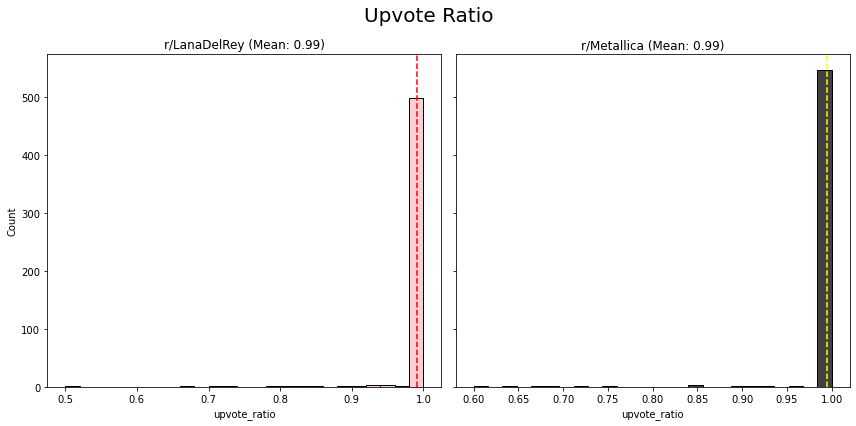

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
mean_1 = ldr_col['upvote_ratio'].mean()
g1 = sns.histplot(data=ldr_col, x='upvote_ratio', ax = ax[0], bins=25, color='pink')
g1.set_title(f'r/LanaDelRey (Mean: {(mean_1):.2f})')
ax[0].axvline(mean_1, ls='--', color='red')
mean_2 = metal_col['upvote_ratio'].mean()
g2 = sns.histplot(data=metal_col, x='upvote_ratio', ax = ax[1], bins=25, color='black')
g2.set_title(f'r/Metallica (Mean: {(mean_2):.2f})')
ax[1].axvline(mean_2, ls='--', color='yellow')
plt.suptitle('Upvote Ratio', fontsize=20)
plt.tight_layout()

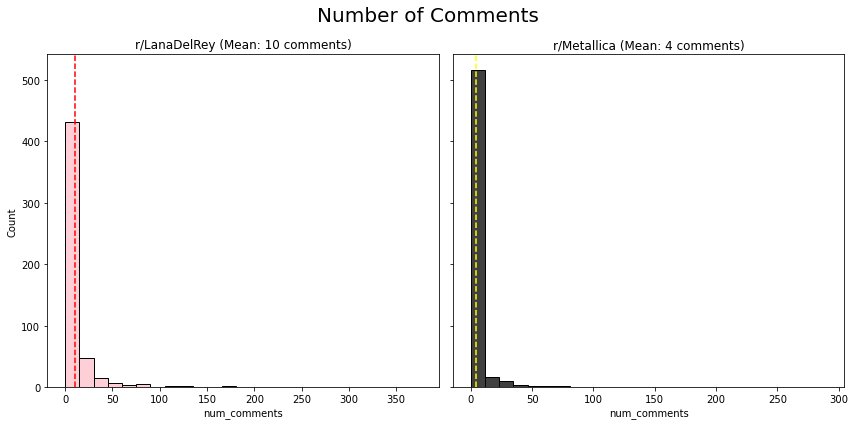

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
mean_1 = ldr_col['num_comments'].mean()
g1 = sns.histplot(data=ldr_col, x='num_comments', ax = ax[0], bins=25, color='pink')
g1.set_title(f'r/LanaDelRey (Mean: {round(mean_1)} comments)')
ax[0].axvline(mean_1, ls='--', color='red')
mean_2 = metal_col['num_comments'].mean()
g2 = sns.histplot(data=metal_col, x='num_comments', ax = ax[1], bins=25, color='black')
g2.set_title(f'r/Metallica (Mean: {round(mean_2)} comments)')
ax[1].axvline(mean_2, ls='--', color='yellow')
plt.suptitle('Number of Comments', fontsize=20)
plt.tight_layout()

r/lanadelrey has more comments than r/metallica subreddit posts which means more active users. This could also be because she is consistently creating new albums.

### EDA 

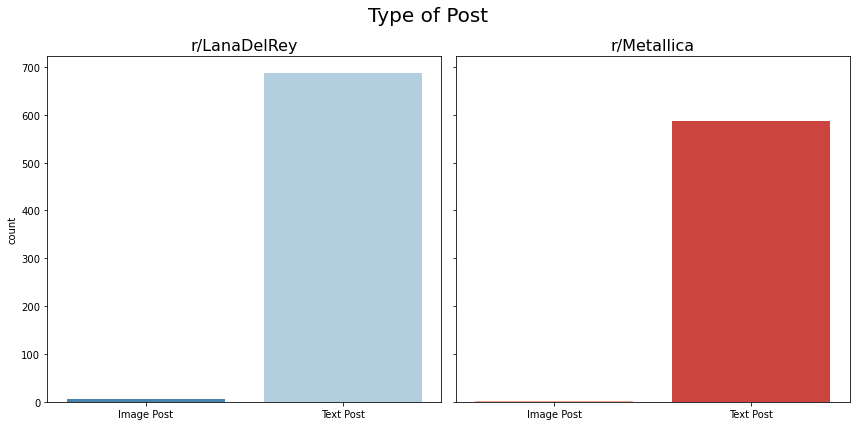

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
g1 = sns.countplot(data=ori_ldr, x=ori_ldr['is_self'].astype(int), ax = ax[0], palette='Blues_r')
g1.set_xticklabels(['Image Post', 'Text Post'])
g1.set_title('r/LanaDelRey', fontsize=16)
g1.set_xlabel('')
g2 = sns.countplot(data=ori_met, x=ori_met['is_self'].astype(int), ax = ax[1], palette='Reds')
g2.set_xticklabels(['Image Post', 'Text Post'])
g2.set_title('r/Metallica', fontsize=16)
g2.set_ylabel('')
g2.set_xlabel('')
plt.suptitle('Type of Post', fontsize=20)
plt.tight_layout()

Most posts in both lanadelrey and metallica are text posts. We will remove those that are image posts for this study.

In [76]:
ldr_col['title_len'].mean()

5.712092130518234

In [77]:
metal_col['title_len'].mean()

5.172905525846702

### Title and post length

In [78]:
def subplot_histograms(colname,colcount, graph_title):
    fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    ax = ax.ravel()
    
    # Plot first df   
    g1 = sns.histplot(data=ldr_col, x=colcount, ax = ax[0], bins=25, color='plum')
    mean_1 = ldr_col[colcount].mean()
    ax[0].axvline(mean_1, ls='--', color='black')
    g1.set_title(f'r/LanaDelRey (Mean: {round(mean_1)} words)')
    g1.set_xlabel(f'Length of {colname.capitalize()}')
    
    # Plot second df
    g2 = sns.histplot(data=metal_col, x=colcount, ax = ax[1], bins=25, color='Red')
    mean_2 = metal_col[colcount].mean()
    ax[1].axvline(mean_2, ls='--', color='black')
    g2.set_title(f'r/Metallica (Mean: {round(mean_2)} words)')
    g2.set_xlabel(f'Length of {colname.capitalize()}')
    plt.suptitle(graph_title, fontsize=20)
    plt.tight_layout()

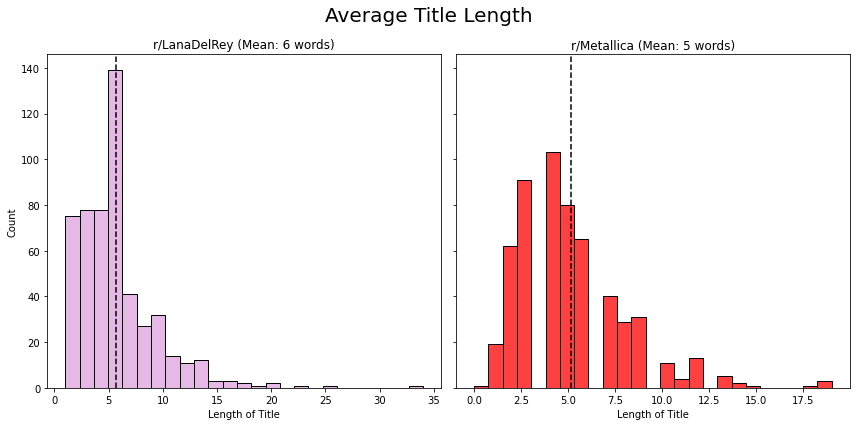

In [79]:
subplot_histograms(colname='title',colcount='title_len',graph_title='Average Title Length')

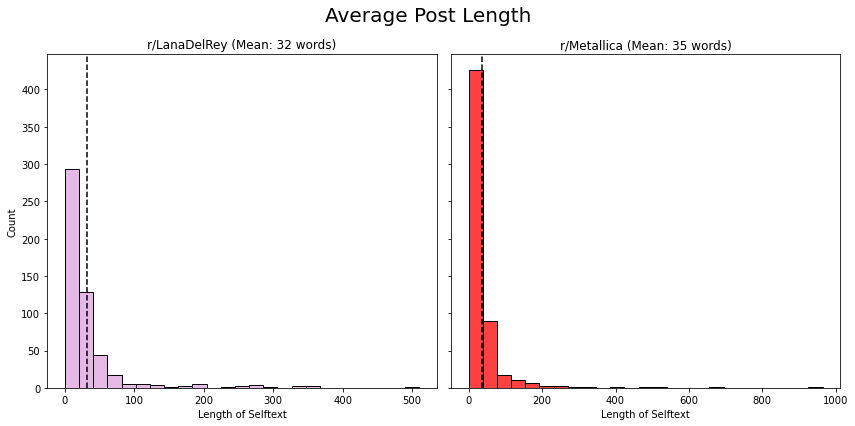

In [80]:
subplot_histograms('selftext','selftext_len','Average Post Length')

r/LanaDelRey generally has higher title and lower post lengths than r/Metallica. More of the features will most likely come from metallica for our classifier model.

### Top words by wordcloud

In [81]:
from PIL import Image
import numpy as np

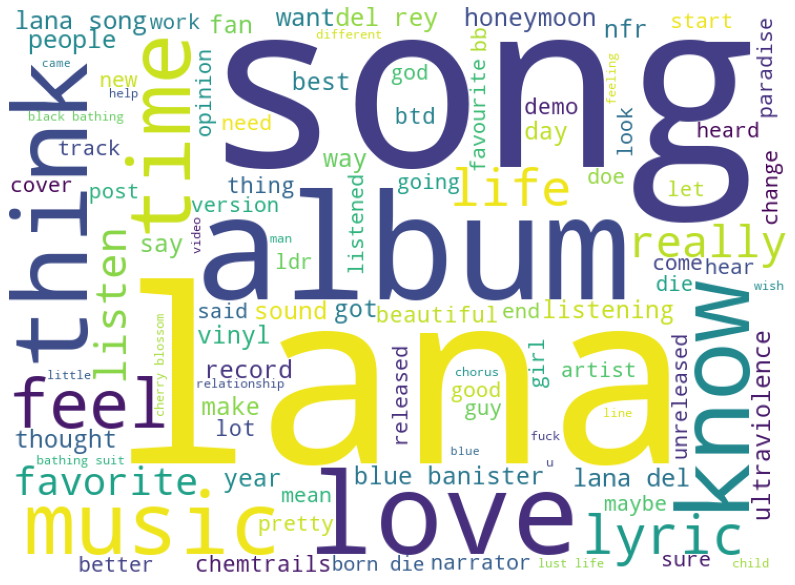

In [82]:
#https://www.datacamp.com/community/tutorials/wordcloud-python

text = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for x in ldr_col.title_text_lem_stop: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='red',
                      min_font_size = 10).generate(text)
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('ldr.png')

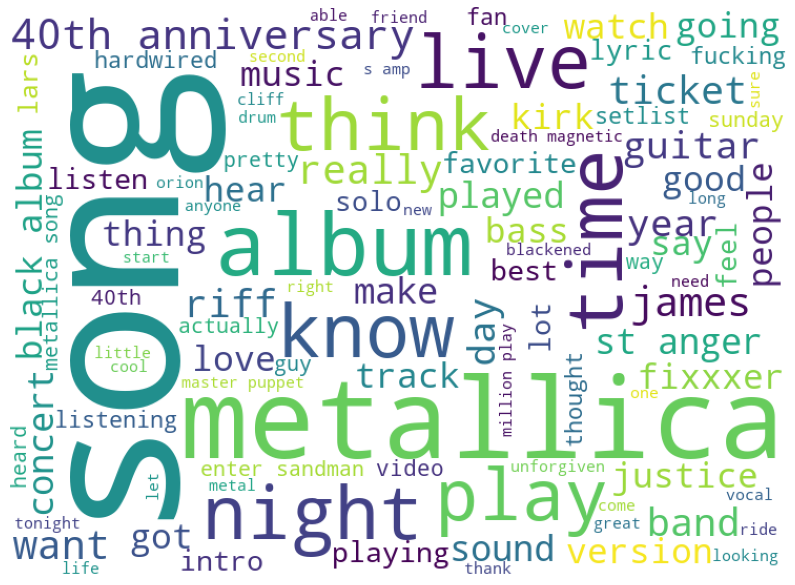

In [83]:
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in metal_col.title_text_lem_stop: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('cloud.png')

In [84]:
# Create function to get top words
def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

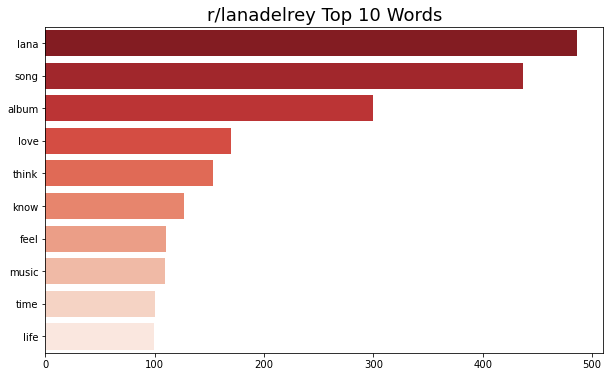

In [85]:
plot_top_words(ldr_col,'title_text_lem_stop', 10, 1, 'r/lanadelrey Top 10 Words', 'Reds_r')

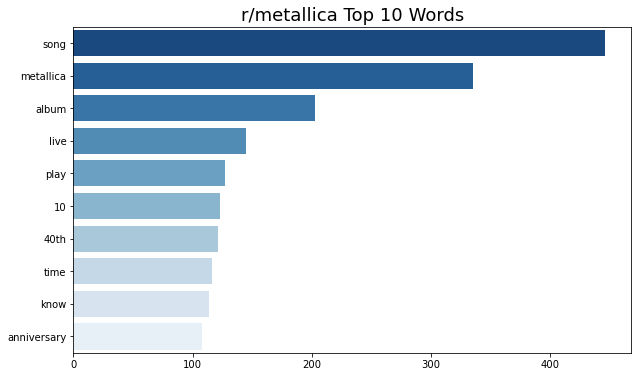

In [86]:
plot_top_words(metal_col,'title_text_lem_stop', 10, 1, 'r/metallica Top 10 Words', 'Blues_r')

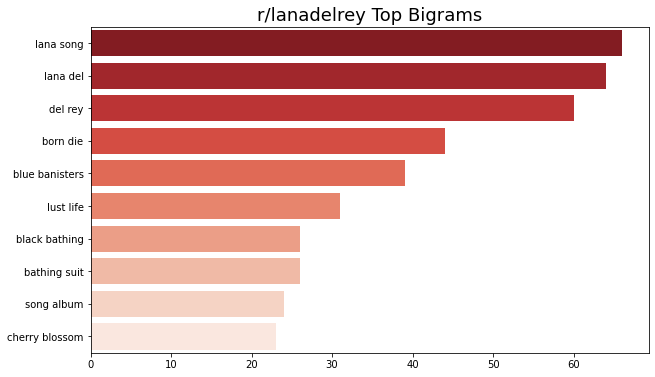

In [87]:
plot_top_words(ldr_col,'title_text_lem_stop', 10, 2, 'r/lanadelrey Top Bigrams', palette='Reds_r')

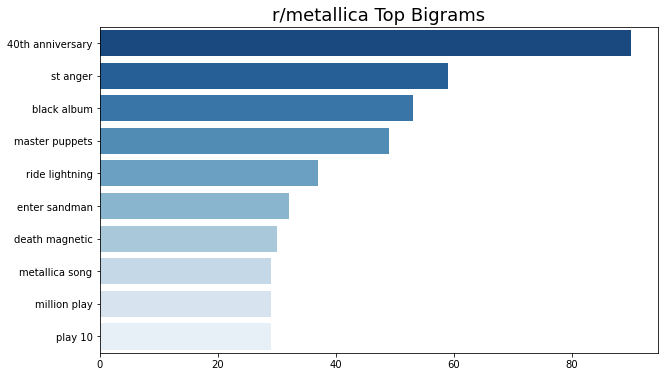

In [88]:
plot_top_words(metal_col,'title_text_lem_stop', 10, 2, 'r/metallica Top Bigrams', palette='Blues_r')

* The top bigrams for r/lanadelrey are ways to search her name and her most recognized songs.
* The top bigrams for r/metallica is their 40th anniversary and also their most recognized songs..

In [89]:
#combine datasets
df = pd.concat([ldr_col, metal_col]).reset_index (drop=True)

In [90]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\14792\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [91]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

In [92]:
# Calculate sentiment of all the title and texts
df['scores']=df['title_text_lem_stop'].apply(sent.polarity_scores)

In [93]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores
0,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,i realli want to buy one and i final save up e...,what happen to the etsi shop that sold the hea...,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace,What happened etsy shop sold heart necklace I ...,7,11,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp..."
1,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,i wa lucki to find it for 56 at a local record...,is the standard black nfr vinyl rare,i wa lucky to find it for 56 at a local record...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare,standard black nfr vinyl rare lucky 56 local r...,5,23,"{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'co..."
2,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,hi everyon we are a commun focus music journal...,is blue banist the best folk or folk adjac alb...,Hi everyone We are a community focused music j...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...,Is Blue Banisters best folk folk adjacent albu...,9,44,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
3,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,what lana song ha thi effect on you vg for me ...,i can listen to video game everi singl day and...,what Lana song ha this effect on you VG for me...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...,I listen Video Games single day I mesmerized b...,10,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,what album out of lana s discographi would you...,what s lana s most lana del rey album,What album out of Lana s discography would you...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album,What Lana Most Lana Del Rey Album What album L...,7,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [94]:
df['compound']=[x['compound'] for x in df['scores']]

In [95]:
df['compound_score']=['positive' if row>=0.05 else 'negative' if row <=-0.05 else 'neutral' for row in df['compound']]

In [96]:
df['compound'].groupby(df['subreddit']).mean()

subreddit
Metallica     0.193333
lanadelrey    0.385093
Name: compound, dtype: float64

Both subreddit posts are reflecting positive sentiments on both lanadelrey and Metallica but slightly higher positive response on lanadelrey.

In [97]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,...,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score
0,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,...,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace,What happened etsy shop sold heart necklace I ...,7,11,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.2263,positive
1,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,...,i wa lucky to find it for 56 at a local record...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare,standard black nfr vinyl rare lucky 56 local r...,5,23,"{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'co...",0.5859,positive
2,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,...,Hi everyone We are a community focused music j...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...,Is Blue Banisters best folk folk adjacent albu...,9,44,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9531,positive
3,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,...,what Lana song ha this effect on you VG for me...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...,I listen Video Games single day I mesmerized b...,10,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,...,What album out of Lana s discography would you...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album,What Lana Most Lana Del Rey Album What album L...,7,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [98]:
#map str response to number
df['is_ldr']=df['subreddit'].map({'Metallica':0, 'lanadelrey':1})

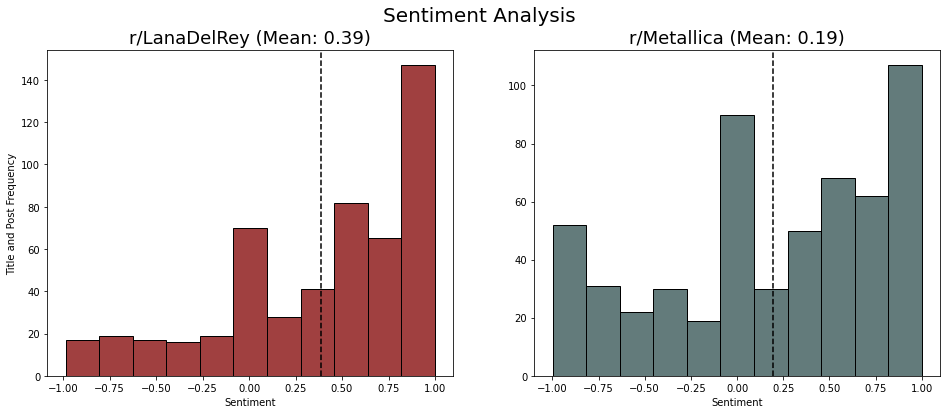

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.ravel()
sns.histplot(df[df['is_ldr'] == 1]['compound'].values, color='maroon', ax = ax[0])
sns.histplot(df[df['is_ldr'] == 0]['compound'].values, color='darkslategrey', ax = ax[1])
mean_1 = df[df['is_ldr'] == 1]['compound'].mean()
mean_2 = df[df['is_ldr'] == 0]['compound'].mean()
ax[0].set_title(f'r/LanaDelRey (Mean: {(mean_1):.2f})', fontsize=18)
ax[1].set_title(f'r/Metallica (Mean: {(mean_2):.2f})', fontsize=18)
ax[0].axvline(mean_1, ls='--', color='black')
ax[1].axvline(mean_2, ls='--', color='black')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Title and Post Frequency')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('')
plt.suptitle('Sentiment Analysis', fontsize=20);

The sentiment is mainly positive for r/lanadelrey, not so much for r/metallica. With lanadelrey quite a bit more positive which is a good motivation to promote new users to join. We also see higher number of title and post leaning towards positive sentiment as well which further strengthens the direction.



In [100]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,...,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score,is_ldr
0,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace,What happened etsy shop sold heart necklace I ...,7,11,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.2263,positive,1
1,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare,standard black nfr vinyl rare lucky 56 local r...,5,23,"{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'co...",0.5859,positive,1
2,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...,Is Blue Banisters best folk folk adjacent albu...,9,44,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9531,positive,1
3,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...,I listen Video Games single day I mesmerized b...,10,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1
4,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album,What Lana Most Lana Del Rey Album What album L...,7,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1


### Sentiment Visualization with Scattertext

Scattertext can help visualize what words and phrases are more characteristic of a category than others. Below, we'll try to visualize sentiment across both subreddits and see what are the most 'positive' and 'negative' words.

Scattertext uses scaled f-score (the harmonic mean between precision and recall), which takes into account category-specific precision and term frequency when ranking words. A detailed explanation of the formula behind scaled f-score can be found here.

In this case, we'll be looking to compare positive and negative sentiment posts. While a word may appear frequently in either the negative or positive category, Scattertext can use scaled f-score to detect whether a particular term is more characteristic of a particular category.

In [101]:
#pip install scattertext

In [102]:
#https://spacy.io/usage/models/
#pip install spaCy

In [103]:
import spacy 
import scattertext as st
from IPython.display import IFrame

In [104]:
nlp = spacy.load('en_core_web_sm')

In [105]:
# Build corpus for Scattertext sentiment analysis
corpus = st.CorpusFromPandas(df, category_col='compound_score', text_col='title_text_lem_stop', nlp=nlp).build()

In [106]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,upvote_ratio,author,num_comments,...,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score,is_ldr
0,lanadelrey,True,False,I really wanted to buy one and I finally saved...,What happened to the etsy shop that sold the h...,t5_2tegk,1640906654,1.0,artisticphangirl,0,...,What happened to the etsy shop that sold the h...,I really wanted buy I finally saved But shop D...,What happened etsy shop sold heart necklace,What happened etsy shop sold heart necklace I ...,7,11,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.2263,positive,1
1,lanadelrey,True,False,i was lucky to find it for 56$ at a local reco...,is the standard black nfr vinyl rare?,t5_2tegk,1640901920,1.0,ambriebat,0,...,is the standard black nfr vinyl rare,lucky 56 local record shop couple day ago look...,standard black nfr vinyl rare,standard black nfr vinyl rare lucky 56 local r...,5,23,"{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'co...",0.5859,positive,1
2,lanadelrey,True,False,Hi everyone We are a community-focused music j...,Is Blue Banisters the best folk (or folk-adjac...,t5_2tegk,1640901006,1.0,BLIGATORY,0,...,Is Blue Banisters the best folk or folk adjace...,Hi We community focused music journalism outle...,Is Blue Banisters best folk folk adjacent albu...,Is Blue Banisters best folk folk adjacent albu...,9,44,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp...",0.9531,positive,1
3,lanadelrey,True,False,what Lana song has this effect on you? VG for ...,I can listen to Video Games every single day a...,t5_2tegk,1640900733,1.0,throwitawayar,0,...,I can listen to Video Games every single day a...,Lana song effect VG surreal,I listen Video Games single day I mesmerized b...,I listen Video Games single day I mesmerized b...,10,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1
4,lanadelrey,True,False,What album out of Lana’s discography would you...,What’s Lana’s Most “Lana Del Rey” Album,t5_2tegk,1640893285,1.0,Which_Relation_9766,0,...,What s Lana s Most Lana Del Rey Album,What album Lana discography consider Lana Del Rey,What Lana Most Lana Del Rey Album,What Lana Most Lana Del Rey Album What album L...,7,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1


In [107]:
html = st.produce_scattertext_explorer(corpus, 
                                       category='positive', 
                                       category_name='positive', 
                                       not_category_name='negative',
                                       width_in_pixels=1000, 
                                       metadata=df['subreddit'],
                                       save_svg_button=True)

In [108]:
html_file_name = "Project_3_ldr_Metal_Sentiment_Analysis.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))

965562

In [109]:
 IFrame(src="Project_3_ldr_Metal_Sentiment_Analysis.html", width = 1300, height=700)

Link to interactive scatterplot: http://localhost:8888/lab/tree/Downloads/Project_3_ldr_Metaln_Sentiment_Analysis.html

The blue dots represent words that have been ranked as positive, while the red dots represent words that have been ranked as negative. As a general observation, the words in blue are used in both r/lanadelrey and r/metallica but higher frequency in lanadelrey because we have more posts and words in metallica. Negative top words such as 'anger', 'death', and 'destroy' might come from r/metallica which is predictable considering the type of music. Assuming the top negative words all come from r/metallica, where as a huge majority of the top positive words come from r/lanadelrey. Making the keywords that much more predictible for modeling. .

In [111]:
#save to file as csv
df.to_csv('df_subs.csv', index=False)